In [1]:
## import the libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## Dataset Characteristics 

In [18]:
df = pd.read_csv('msk_impact_2017_clinical_data.tsv', sep = '\t' )

In [3]:
## first 5top rows from the dataframe
df.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,...,1,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,...,1,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,...,1,454,Primary,Male,Never,Matched,FFPE,Biopsy,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,...,1,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,...,2,1161,Primary,Female,Never,Matched,FFPE,Resection,NaN,ALIVE


In [4]:
## columns data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       10945 non-null  object 
 1   Patient ID                     10945 non-null  object 
 2   Sample ID                      10945 non-null  object 
 3   Cancer Type                    10945 non-null  object 
 4   Cancer Type Detailed           10945 non-null  object 
 5   DNA Input                      10945 non-null  float64
 6   Fraction Genome Altered        10939 non-null  float64
 7   Matched Status                 10945 non-null  object 
 8   Metastatic Site                4779 non-null   object 
 9   Mutation Count                 10945 non-null  int64  
 10  Oncotree Code                  10945 non-null  object 
 11  Overall Survival (Months)      8142 non-null   float64
 12  Overall Survival Status        10943 non-null 

In [5]:
## statistical discription of the numeric columns
df.describe()

,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,Tumor Purity
count,10945.000000,10939.000000,10945.000000,8142.000000,10945.000000,10945.000000,10475.000000
mean,238.598098,0.194683,7.126176,12.456394,1.120786,717.547190,45.610597
std,36.335811,0.189345,16.809472,7.765755,0.371490,267.344696,22.283762
min,50.000000,0.000000,0.000000,0.000000,1.000000,48.000000,10.000000
25%,250.000000,0.035500,2.000000,6.540000,1.000000,538.000000,30.000000
50%,250.000000,0.144900,4.000000,11.140000,1.000000,726.000000,40.000000
75%,250.000000,0.296200,7.000000,17.350000,1.000000,895.000000,60.000000
max,250.000000,1.000000,455.000000,40.400000,5.000000,2778.000000,100.000000


In [8]:
# check the dataset features
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Somatic Status',
       'Specimen Preservation Type', 'Specimen Type', 'Tumor Purity',
       'Patient's Vital Status'],
      dtype='object')

In [15]:
len(df['Cancer Type'].unique())

57

## Data Cleansing

### 1- Droping unrelated features

In [19]:
# dropping unrelated and duplicated features
df.drop(labels = ['Study ID', 'Sample ID','Matched Status','Number of Samples Per Patient',
                    'Sample Class', 'Sample Collection Source', 'Sample coverage', 'Somatic Status',
                    'Specimen Preservation Type', 'Specimen Type', 'Sample Type', 'Overall Survival Status']
                    , axis = 1, inplace = True)


In [20]:
df.head()

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Primary Tumor Site,Sex,Smoking History,Somatic Status,Tumor Purity,Patient's Vital Status
0,P-0000004,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,NaN,16,IDC,NaN,Breast,Female,Unknown,Matched,50.0,ALIVE
1,P-0000015,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Liver,7,IDC,NaN,Breast,Female,Never,Matched,40.0,DECEASED
2,P-0000023,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,NaN,5,PEMESO,8.71,Peritoneum,Male,Never,Matched,30.0,DECEASED
3,P-0000024,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Lung,6,UEC,36.75,Uterus,Female,Prev/Curr Smoker,Matched,40.0,ALIVE
4,P-0000025,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,NaN,1,USC,8.81,Uterus,Female,Never,Matched,NaN,ALIVE


### 2- Dealing with null values

In [21]:
# drop observations where Tumor Purity  is null
df.drop(df[df['Tumor Purity'].isnull()].index, inplace = True)
df[df['Tumor Purity'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Primary Tumor Site,Sex,Smoking History,Somatic Status,Tumor Purity,Patient's Vital Status


In [22]:
# reccheck null values in each column
df.isna().sum()

Patient ID                      0
Cancer Type                     0
Cancer Type Detailed            0
DNA Input                       0
Fraction Genome Altered         4
Metastatic Site              5924
Mutation Count                  0
Oncotree Code                   0
Overall Survival (Months)    2659
Primary Tumor Site             28
Sex                             0
Smoking History                 2
Somatic Status                  0
Tumor Purity                    0
Patient's Vital Status          2
dtype: int64

In [24]:
# drop observations where the target value is null
df.drop(df[df['Patient\'s Vital Status'].isnull()].index, inplace = True)
df[df['Patient\'s Vital Status'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Primary Tumor Site,Sex,Smoking History,Somatic Status,Tumor Purity,Patient's Vital Status


In [25]:
# drop observations where Fraction Genome Altered is null
df.drop(df[df['Fraction Genome Altered'].isnull()].index, inplace = True)
df[df['Fraction Genome Altered'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Primary Tumor Site,Sex,Smoking History,Somatic Status,Tumor Purity,Patient's Vital Status


In [26]:
# drop observations where Primary Tumor Site  is null
df.drop(df[df['Primary Tumor Site'].isnull()].index, inplace = True)
df[df['Primary Tumor Site'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Primary Tumor Site,Sex,Smoking History,Somatic Status,Tumor Purity,Patient's Vital Status


In [27]:
# reccheck null values in each column
df.isna().sum()

Patient ID                      0
Cancer Type                     0
Cancer Type Detailed            0
DNA Input                       0
Fraction Genome Altered         0
Metastatic Site              5893
Mutation Count                  0
Oncotree Code                   0
Overall Survival (Months)    2648
Primary Tumor Site              0
Sex                             0
Smoking History                 0
Somatic Status                  0
Tumor Purity                    0
Patient's Vital Status          0
dtype: int64

In [28]:
# replace null values in Metastatic Site column with Unknown
df['Metastatic Site'].fillna(value = 'Unknown', inplace = True)
df[df['Metastatic Site'].isnull()]

,Patient ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Primary Tumor Site,Sex,Smoking History,Somatic Status,Tumor Purity,Patient's Vital Status


In [29]:
# reccheck null values in each column
df.isna().sum()

Patient ID                      0
Cancer Type                     0
Cancer Type Detailed            0
DNA Input                       0
Fraction Genome Altered         0
Metastatic Site                 0
Mutation Count                  0
Oncotree Code                   0
Overall Survival (Months)    2648
Primary Tumor Site              0
Sex                             0
Smoking History                 0
Somatic Status                  0
Tumor Purity                    0
Patient's Vital Status          0
dtype: int64

## Exploratory Data Analysis

In [30]:
#dataset shape after cleansing
df.shape

(10441, 15)

In [31]:
## get the number of the unique patients
len(df['Patient ID'].unique())

9890

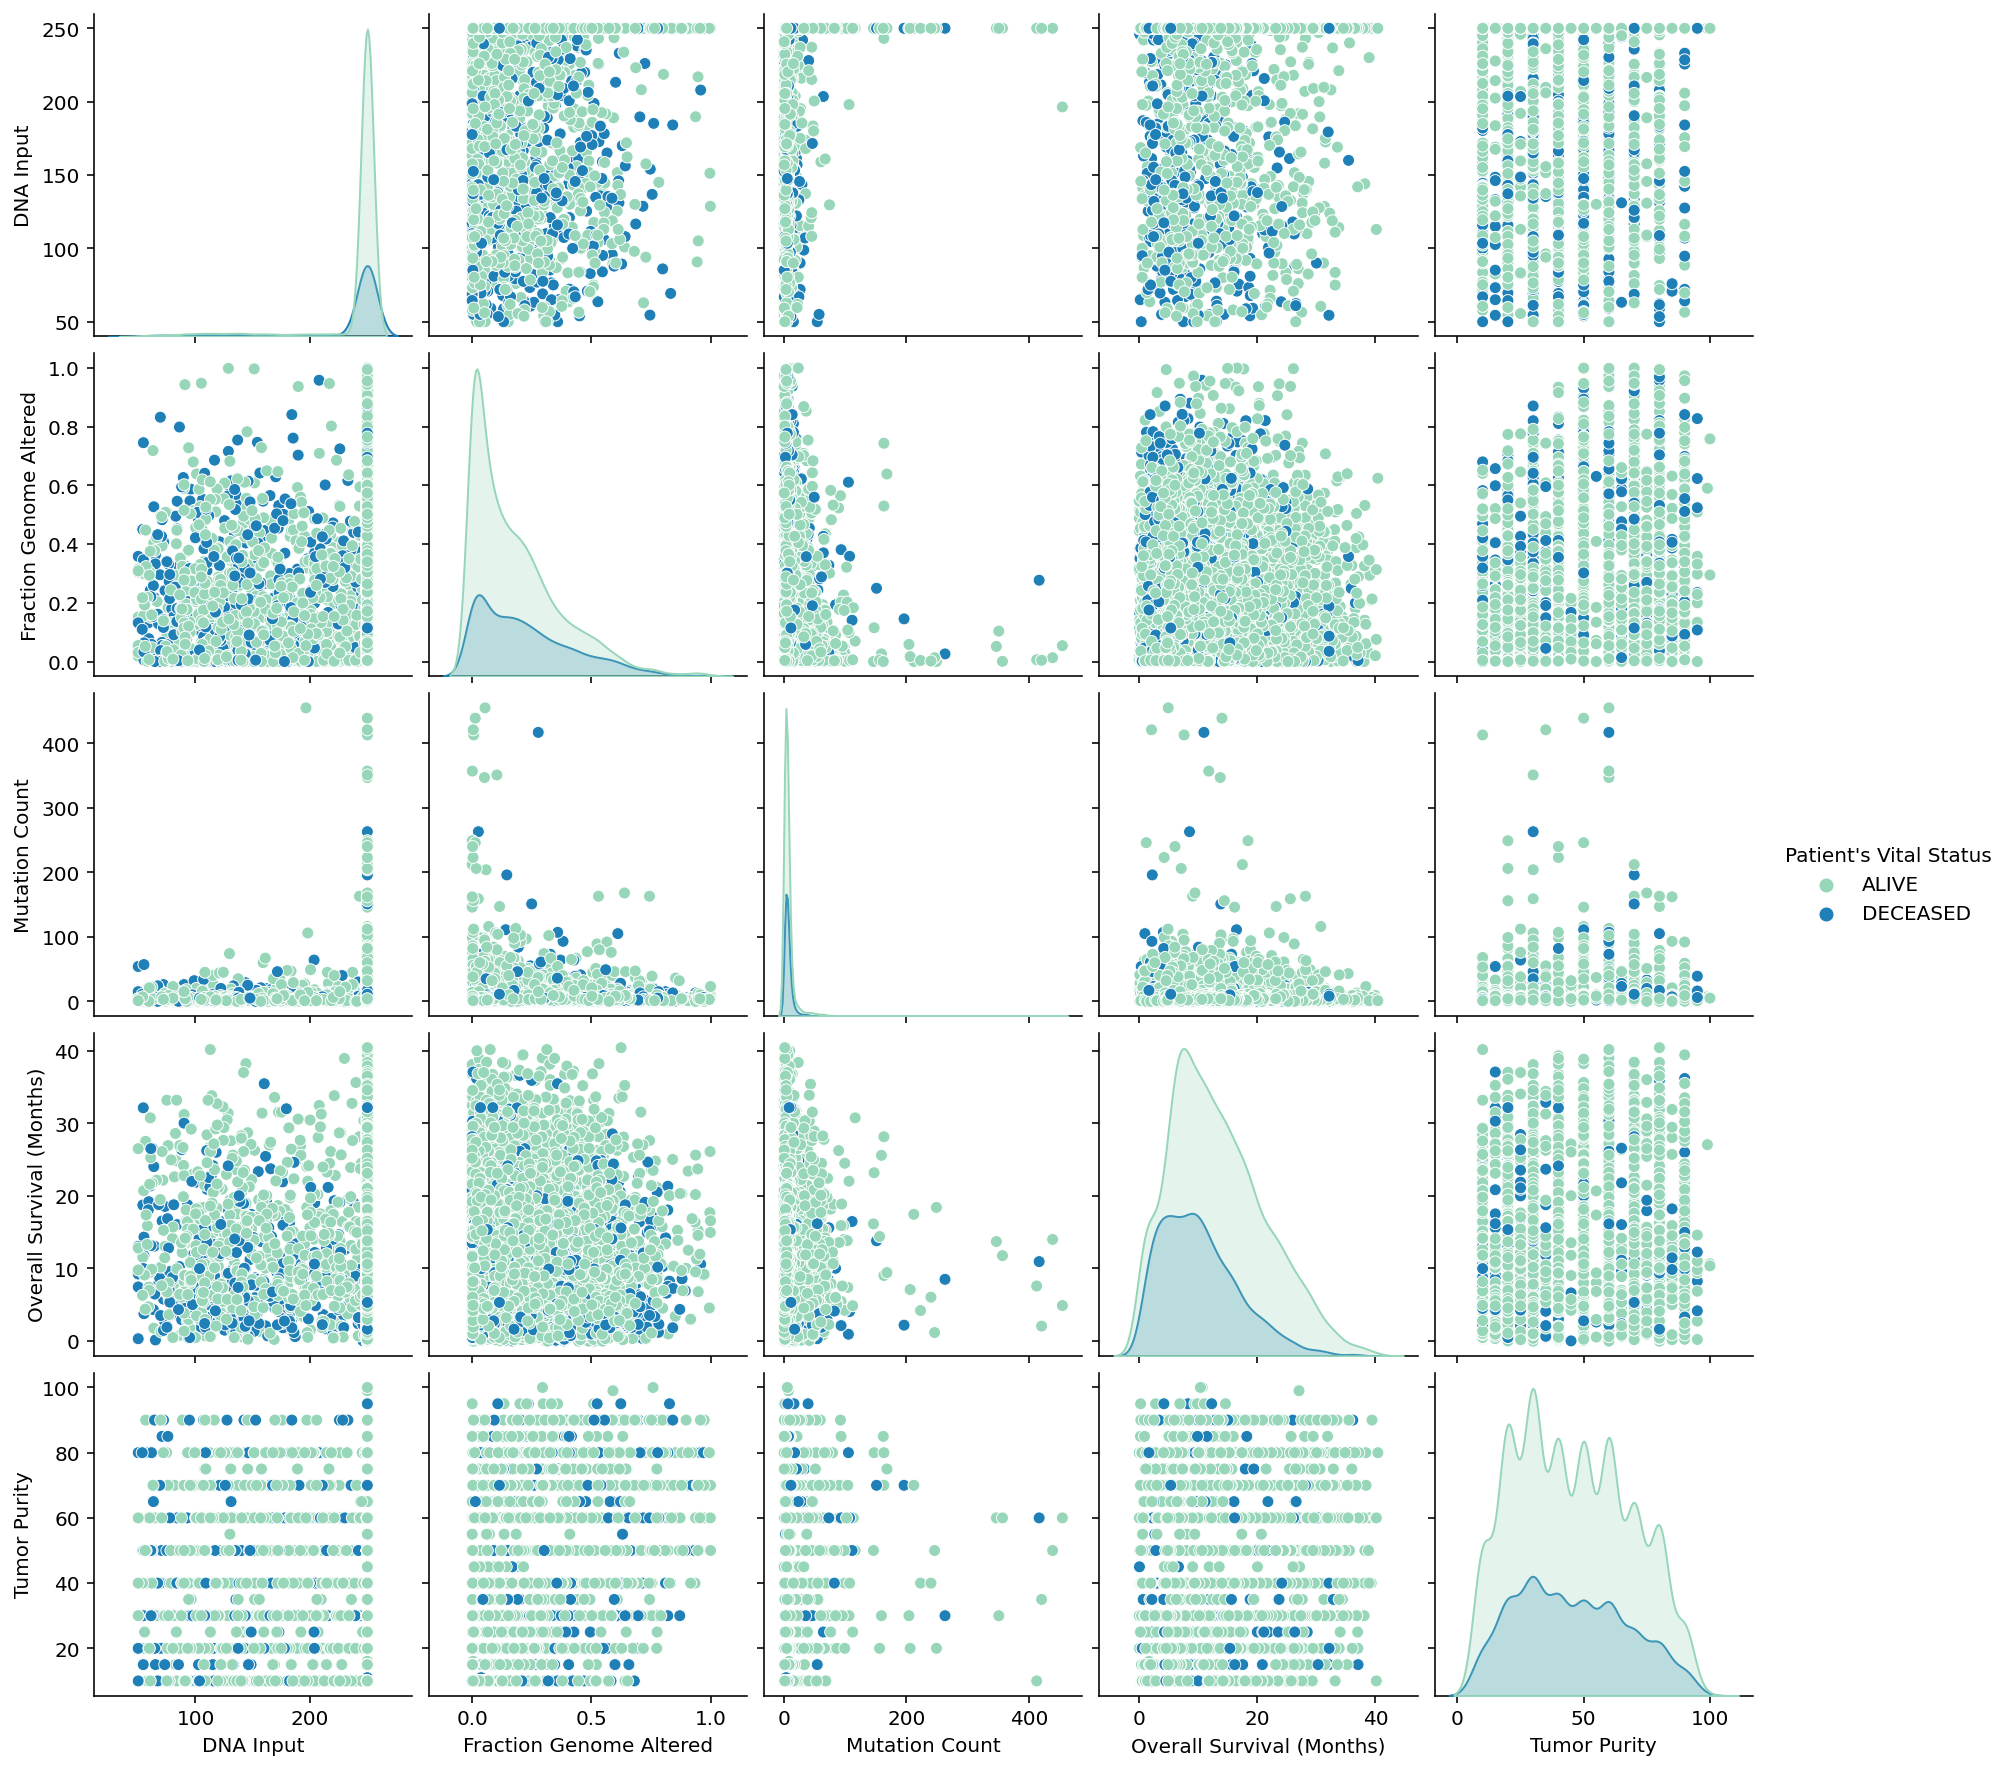

In [33]:
## numeric features distribution and correlation between numeric features
sns.pairplot(df, hue = 'Patient\'s Vital Status', palette="YlGnBu")

array([[<AxesSubplot:title={'center':'DNA Input'}>,
        <AxesSubplot:title={'center':'Fraction Genome Altered'}>],
       [<AxesSubplot:title={'center':'Mutation Count'}>,
        <AxesSubplot:title={'center':'Overall Survival (Months)'}>],
       [<AxesSubplot:title={'center':'Tumor Purity'}>, <AxesSubplot:>]],
      dtype=object)

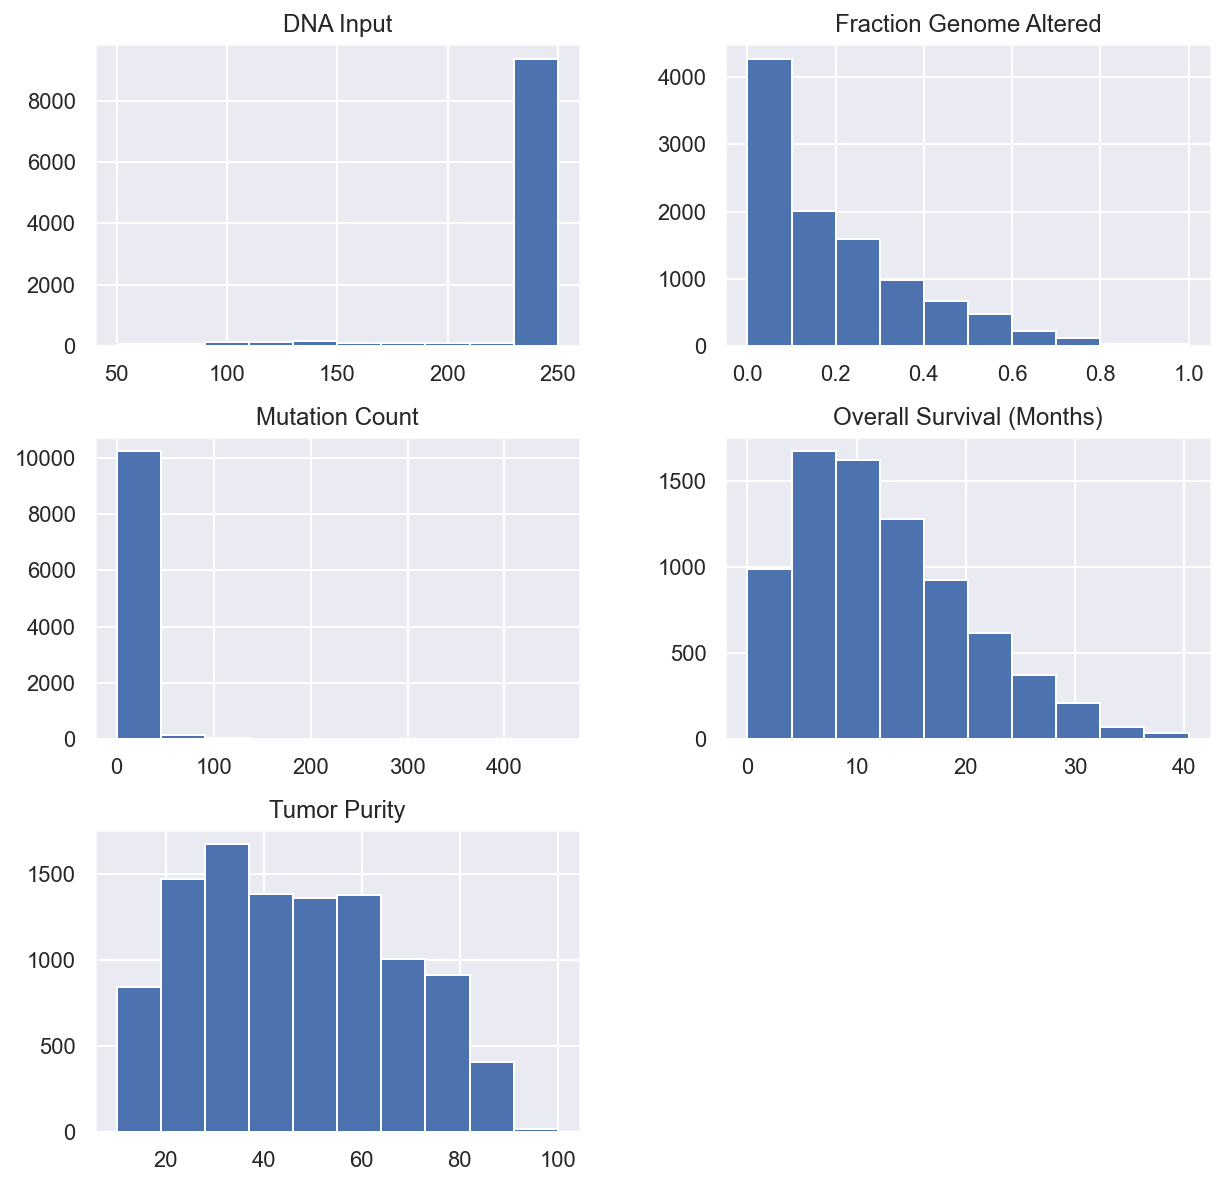

In [59]:
df.hist(figsize = (10,10))

In [35]:
# description of categorical features
df[df.select_dtypes(include = 'object').columns].astype('category').describe().T

,count,unique,top,freq
Patient ID,10441,9890,P-0000377,5
Cancer Type,10441,57,Non-Small Cell Lung Cancer,1541
Cancer Type Detailed,10441,354,Lung Adenocarcinoma,1243
Metastatic Site,10441,146,Unknown,5893
Oncotree Code,10441,365,LUAD,1243
Primary Tumor Site,10441,152,Lung,1643
Sex,10441,2,Female,5231
Smoking History,10441,3,Never,4524
Somatic Status,10441,2,Matched,10216
Patient's Vital Status,10441,2,ALIVE,7513


<AxesSubplot:>

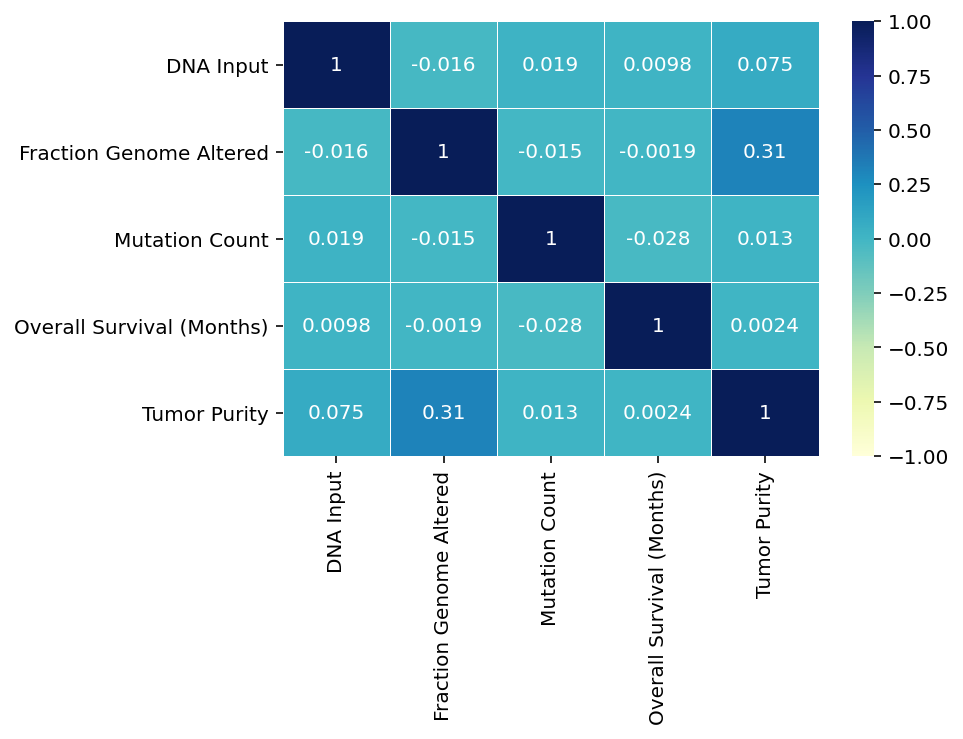

In [36]:
## plot a correlation heatmap of the numerical features 
sns.heatmap(df.select_dtypes(include = np.number).corr(), vmin=-1,vmax=1, annot = True, linewidths=.5, 
                cmap = "YlGnBu")

In [37]:
# create a pie chart to visualize the percentage of survival status 
trace = go.Pie(labels = ['ALIVE','DECEASED'], values = df['Patient\'s Vital Status'].value_counts(),
               textfont=dict(size=15), opacity = 0.8, marker=dict(colors=['lightskyblue', 'gold'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title ='Survival Status Percentage') # plot title
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

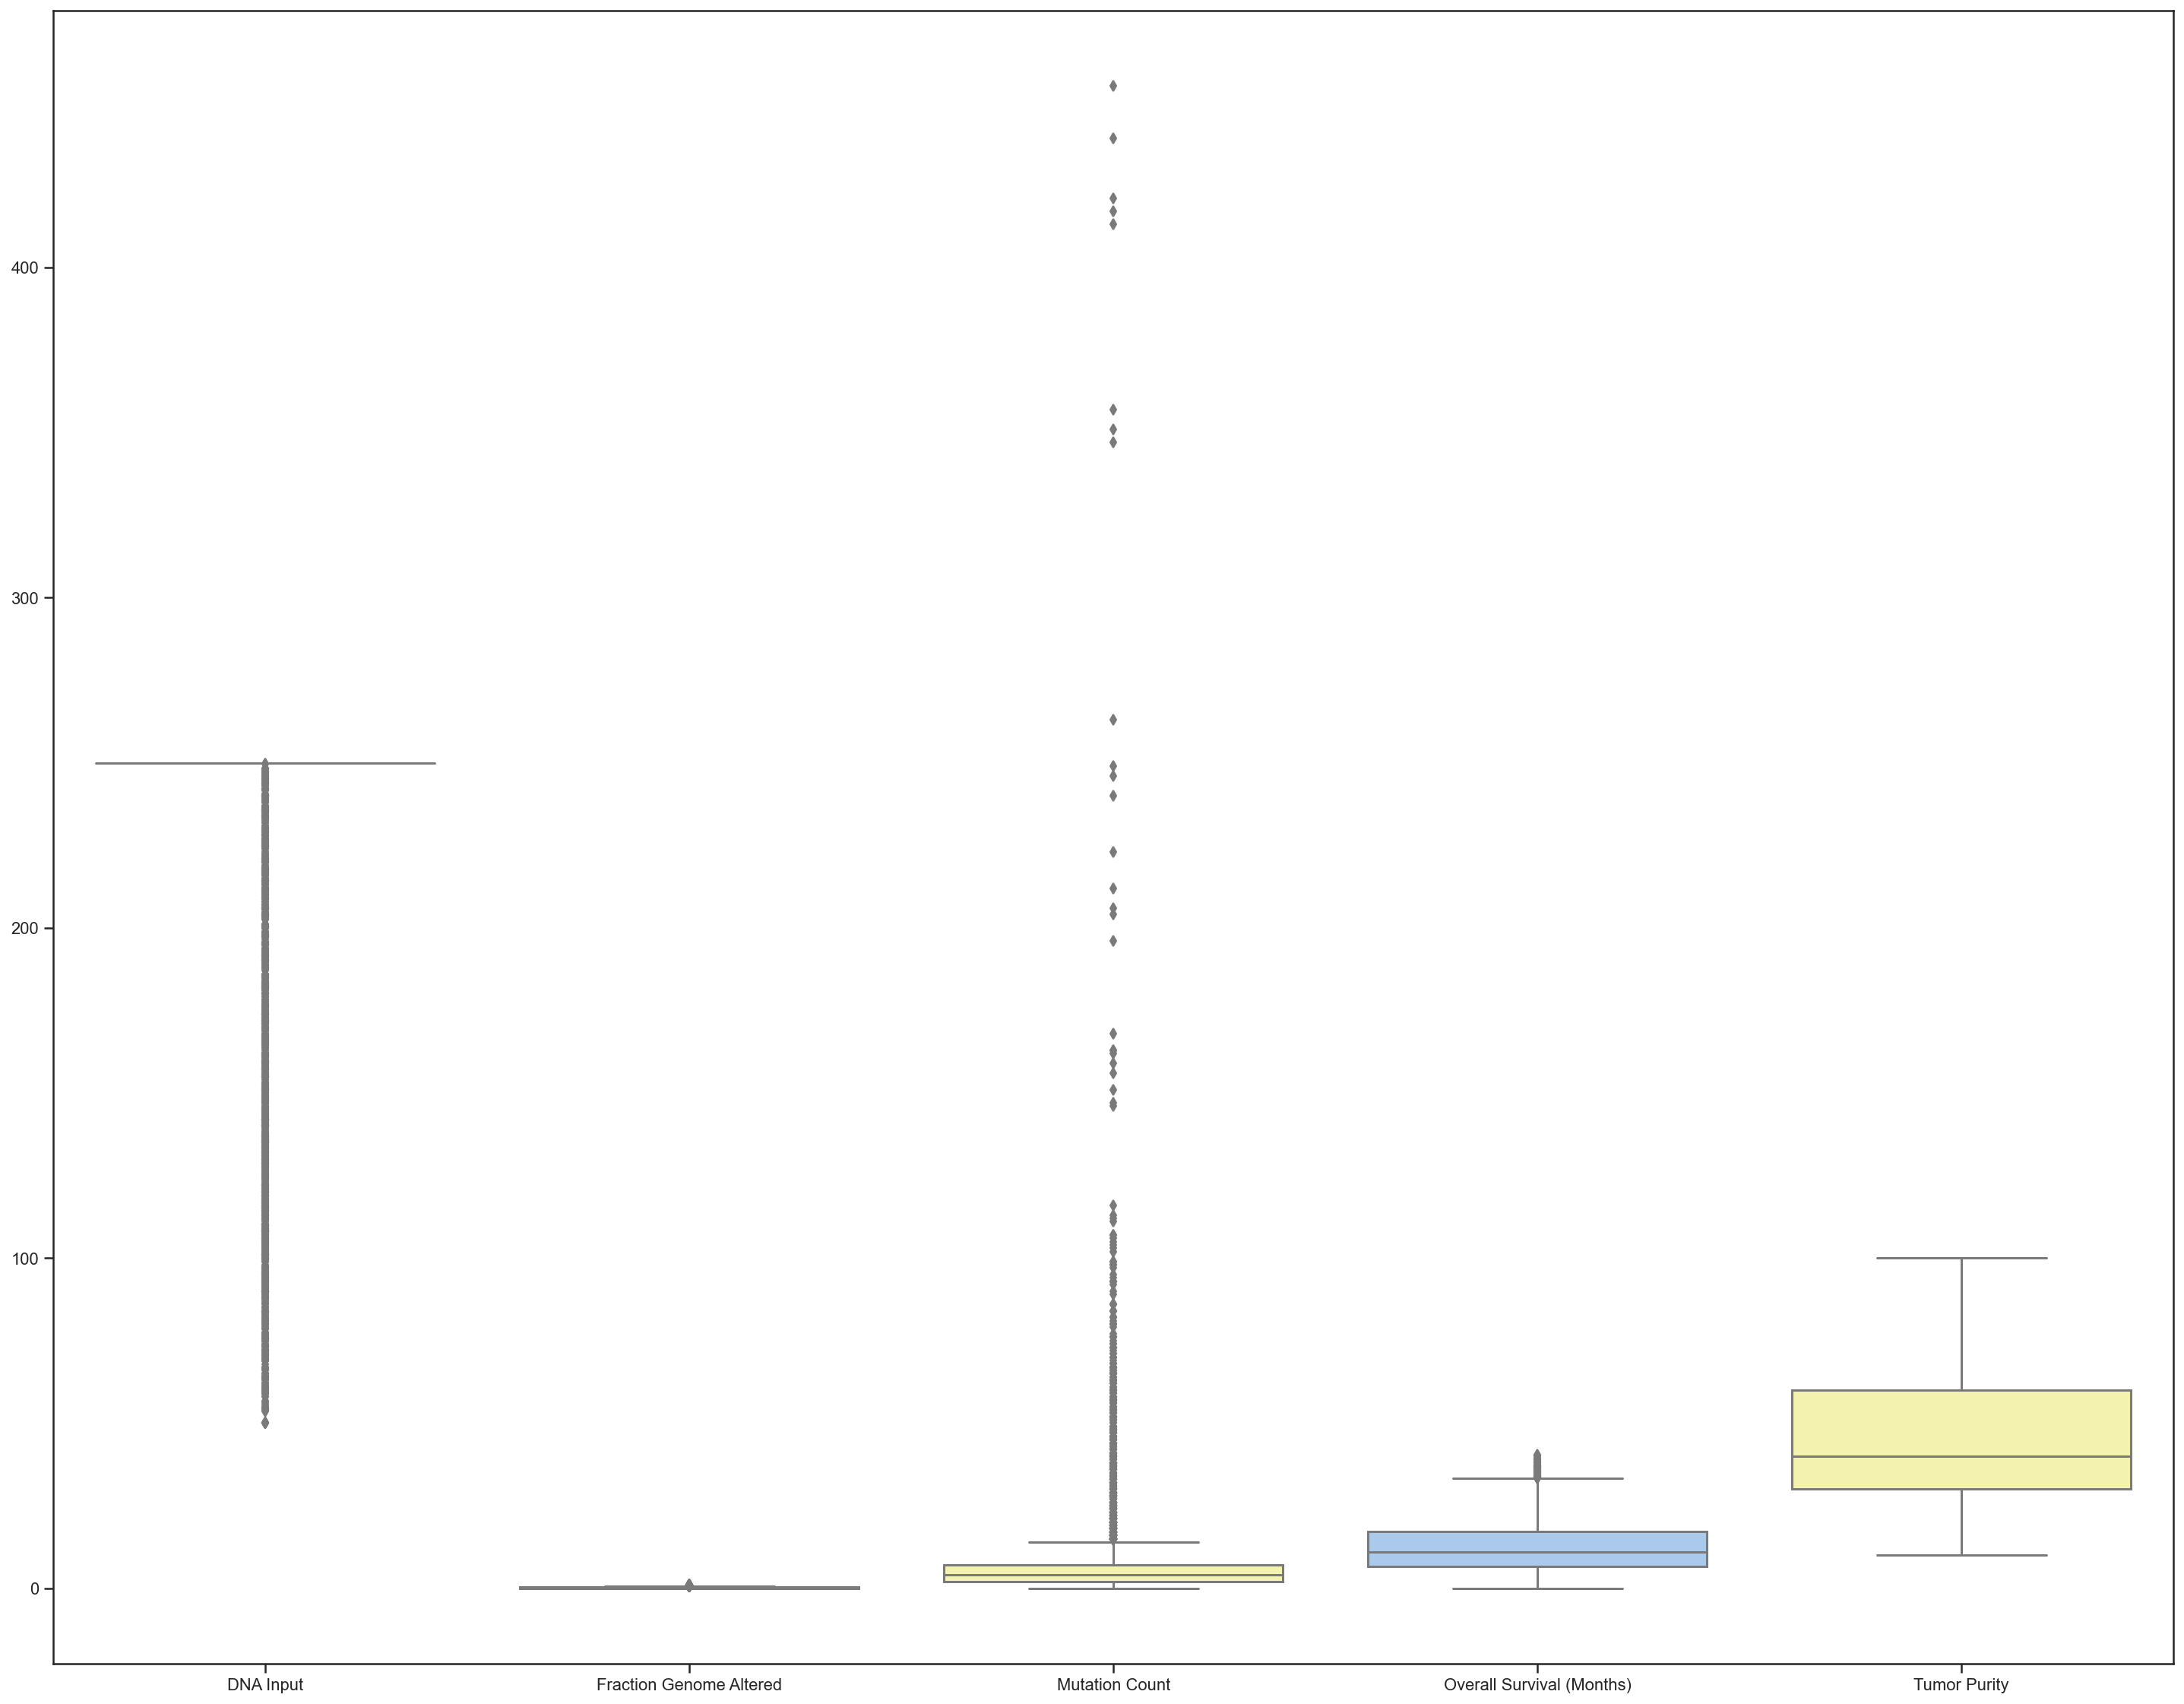

In [58]:
# ploting box plot for numeric features
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot (palette=["y","b"],data=df.select_dtypes(include = np.number))
sns.set(rc={'figure.figsize': (25,20)})